In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("train.csv")

In [5]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [9]:
df.drop(["id","location","keyword"],axis=1,inplace=True)

In [11]:
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [13]:
df.reset_index(inplace=True)
df.drop(["index"],axis=1,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7613 non-null   object
 1   target  7613 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.1+ KB


In [17]:
df

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [19]:
df["target"].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [21]:
value_counts = df['target'].value_counts()

In [23]:
value_counts.index

Index([0, 1], dtype='int64', name='target')

In [25]:
value_counts.values

array([4342, 3271], dtype=int64)

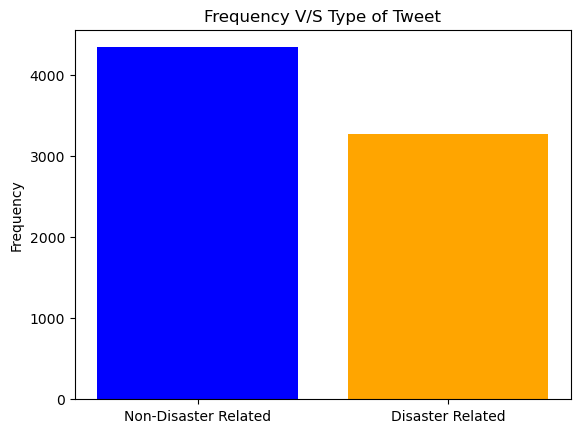

In [27]:
value_counts = df['target'].value_counts()
plt.bar(value_counts.index,value_counts.values,color=['blue','orange'])
plt.title('Frequency V/S Type of Tweet')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Non-Disaster Related', 'Disaster Related'])

plt.show()

In [28]:
import re #Regular Expression
import nltk
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [30]:
custom_stopwords = {"m", "u","rt", "t","co","w","x","p","r" ,"s", "ha" ,"amp", "re","wa"}
stop = set(stopwords.words('english'))
stop.update(custom_stopwords)
sn = SnowballStemmer("english")

In [31]:
lemmatizer = WordNetLemmatizer()
word_list = set(words.words())

def clean_text(text):
    text = text.lower()
    text = re.sub("[^a-z]", ' ', text)   
    text = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in text]
    text = [t for t in lemmatized_words if t not in stop] 
    text = [word for word in text if word in word_list]
    text = ' '.join(text)
    return text

In [32]:
df["Clean_text"] = df["text"].apply(clean_text)

In [33]:
df.head()

,text,target,Clean_text
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may forgive
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la canada
2,All residents asked to 'shelter in place' are ...,1,resident shelter place notified officer evacua...
3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby smoke wildfire school


In [34]:
df.tail()

,text,target,Clean_text
7608,Two giant cranes holding a bridge collapse int...,1,two giant crane holding bridge collapse nearby...
7609,@aria_ahrary @TheTawniest The out of control w...,1,aria control wild fire even northern part stat...
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,volcano
7611,Police investigating after an e-bike collided ...,1,police investigating e bike car little e bike ...
7612,The Latest: More Homes Razed by Northern Calif...,1,latest home northern wildfire news


In [35]:
df = df[df['Clean_text'].str.strip() != '']

In [38]:
from wordcloud import WordCloud

In [40]:
disaster = df[df["target"]==1]
disaster = disaster["Clean_text"]

In [41]:
def word_cloud(data,x=8,y=6):
    words = ' '.join(data)
    wc = WordCloud(background_color='white')
    wc = wc.generate(words)

    plt.figure(figsize=(x,y))
    plt.imshow(wc)
    plt.axis("off")


For Disaster-related Tweets


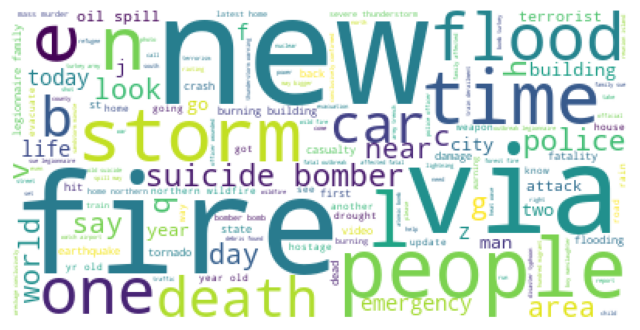

In [42]:
print("For Disaster-related Tweets")
word_cloud(disaster)

In [43]:
usual = df[df["target"]==0]
usual = df["Clean_text"]

For Usual


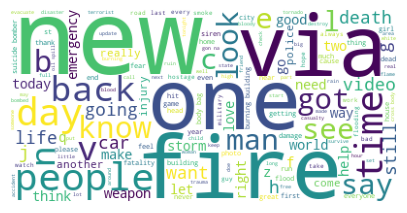

In [44]:
print("For Usual")
word_cloud(usual,5,4)

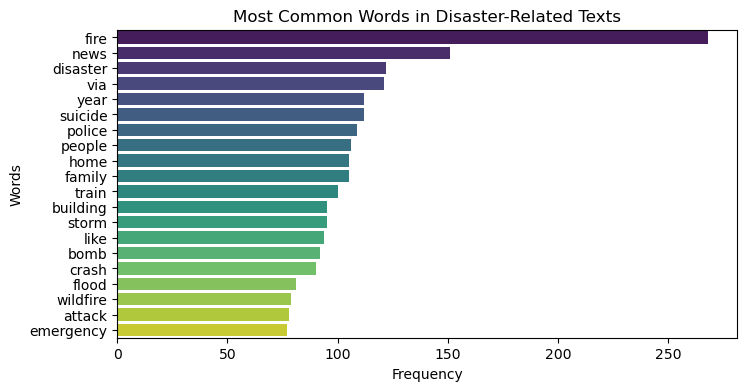

In [45]:
disaster = df[df["target"] == 1]
disaster_text = ' '.join(disaster['Clean_text'])

words1 = disaster_text.split()

word_counts1 = Counter(words1)

most_common_words = word_counts1.most_common(20) 

common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(8, 4))
sns.barplot(x='Frequency', y='Word', data=common_words_df, palette='viridis')
plt.title('Most Common Words in Disaster-Related Texts')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

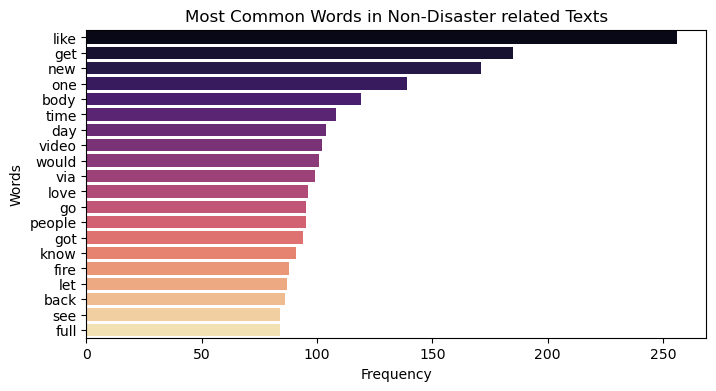

In [46]:
usual = df[df["target"] == 0]
usual_text = usual["Clean_text"].str.cat(sep=' ')

usual_words = usual_text.split()

usual_word_counts = Counter(usual_words)

most_common_usual_words = usual_word_counts.most_common(20)  # Top 20 most common words
common_usual_words_df = pd.DataFrame(most_common_usual_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(8, 4))
sns.barplot(x='Frequency', y='Word', data=common_usual_words_df, palette='magma')
plt.title('Most Common Words in Non-Disaster related Texts')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

In [47]:
df.to_csv("Cleaned_Data.csv")